<a href="https://colab.research.google.com/github/gayathri-garine/LGMVIP-DataScience/blob/main/stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline

In [16]:
df = pd.read_csv('Book1.csv')
df = df.dropna()
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,08-10-2018,208.00,222.25,206.85,216.00,215.15,4642146,10062.83
1,05-10-2018,217.00,218.60,205.90,210.25,209.20,3519515,7407.06
2,04-10-2018,223.50,227.80,216.15,217.25,218.20,1728786,3815.79
3,03-10-2018,230.00,237.50,225.75,226.45,227.60,1708590,3960.27
4,01-10-2018,234.55,234.60,221.05,230.30,230.90,1534749,3486.05


In [17]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1230,14-10-2013,160.85,161.45,157.70,159.3,159.45,1281419,2039.09
1231,11-10-2013,161.15,163.45,159.00,159.8,160.05,1880046,3030.76
1232,10-10-2013,156.00,160.80,155.85,160.3,160.15,3124853,4978.80
1233,09-10-2013,155.70,158.20,154.15,155.3,155.55,2049580,3204.49
1234,08-10-2013,157.00,157.80,155.20,155.8,155.80,1720413,2688.94


In [18]:
df_close = df['Close']
df_close.shape

(1235,)

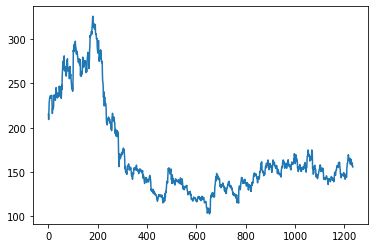

In [19]:
plt.plot(df_close)

In [20]:
scaler = MinMaxScaler(feature_range = (0,1))
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))
df_close.shape

(1235, 1)

In [21]:
df_close

array([[0.50425818],
       [0.47758853],
       [0.51792918],
       ...,
       [0.25773196],
       [0.2371134 ],
       [0.23823398]])

In [22]:
training_size = int(len(df_close) * 0.75)
test_size = len(df_close) - training_size
train_data, test_data = df_close[0:training_size,:], df_close[training_size:len(df_close),:1]



In [23]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)



In [24]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)



In [26]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)


In [27]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)


Epoch 1/100
13/13 [==============================] - 13s 440ms/step - loss: 0.0424 - val_loss: 0.0011
Epoch 2/100
13/13 [==============================] - 5s 377ms/step - loss: 0.0079 - val_loss: 0.0015
Epoch 3/100
13/13 [==============================] - 5s 374ms/step - loss: 0.0031 - val_loss: 0.0012
Epoch 4/100
13/13 [==============================] - 5s 376ms/step - loss: 0.0025 - val_loss: 0.0011
Epoch 5/100
13/13 [==============================] - 5s 377ms/step - loss: 0.0023 - val_loss: 0.0011
Epoch 6/100
13/13 [==============================] - 5s 380ms/step - loss: 0.0022 - val_loss: 0.0011
Epoch 7/100
13/13 [==============================] - 5s 377ms/step - loss: 0.0022 - val_loss: 0.0010
Epoch 8/100
13/13 [==============================] - 5s 377ms/step - loss: 0.0021 - val_loss: 0.0010
Epoch 9/100
13/13 [==============================] - 5s 373ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 10/100
13/13 [==============================] - 5s 371ms/step - loss: 0.0019 - val_l

In [30]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)



In [31]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)


In [32]:
math.sqrt(mean_squared_error(y_train, train_predict))



173.1007788048443

In [33]:
math.sqrt(mean_squared_error(y_test, test_predict))


151.55293457194503

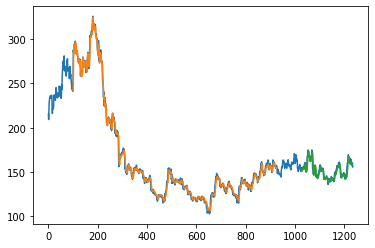

In [34]:
look_back = 100
trainPredictPlot = np.empty_like(df_close)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict


testPredictPlot = np.empty_like(df_close)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df_close) - 1, :] = test_predict

plt.plot(scaler.inverse_transform(df_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()